In [1]:
import os
import random
import sys

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

#from sklearn.svm import SVR
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

#from sklearn.linear_model import Ridge

from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
#from sklearn.multioutput import MultiOutputRegressor
import math
#from yellowbrick.regressor import ResidualsPlot
#from sklearn.metrics import r2_score
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('database_new.xlsx')

# Leave q_abs=0.5-0.8 as test set

In [3]:


# Load dataset

train_set=df[(df['q_abs']<0.5) | (df['q_abs']>0.8)]
test_set=df[(df['q_abs']>=0.5) & (df['q_abs']<=0.8)]
test_set.sort_values(by=['q_abs'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]

scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Mean absolute error on test set:  [0.08991659 0.40591872]
Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-   [0.08991659 0.40591872]


C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

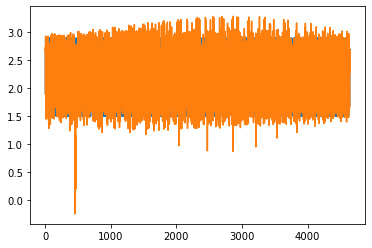

In [4]:
ax=Y_test['fractal_dimension'].plot()
Y_pred['fractal_dimension'].plot(ax=ax)

<AxesSubplot:>

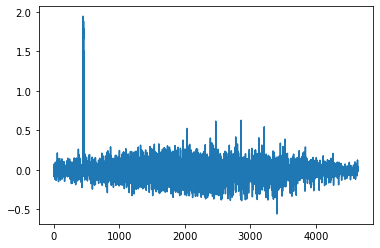

In [5]:
Y_diff['fractal_dimension'].plot()

<AxesSubplot:>

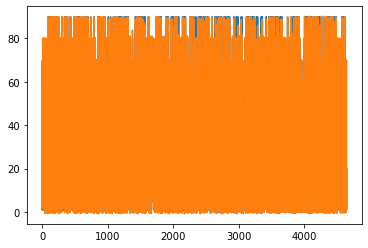

In [6]:
ax=Y_test['fraction_of_coating'].plot()
Y_pred['fraction_of_coating'].plot(ax=ax)

<AxesSubplot:>

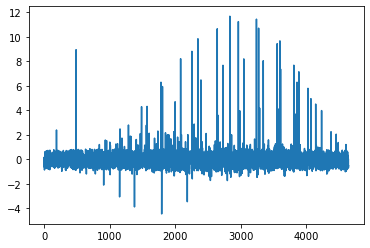

In [7]:
Y_diff['fraction_of_coating'].plot()

<AxesSubplot:>

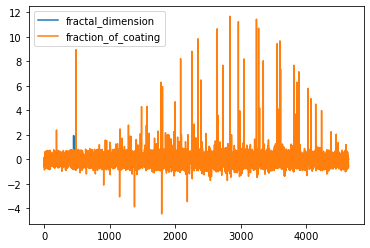

In [8]:
Y_diff.plot()

# Leave q_abs>=1.4 as test set

In [16]:


# Load dataset

train_set = df[(df['q_abs'] < 1.4)]
test_set = df[(df['q_abs'] >= 1.4)]
test_set.sort_values(by=['q_abs'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]

scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Mean absolute error on test set:  [0.19832325 0.58759511]
Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-   [0.19832325 0.58759511]


C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

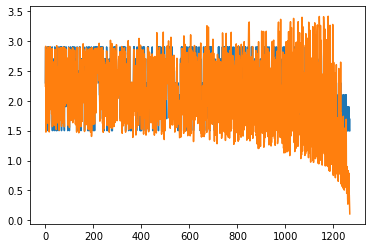

In [17]:
ax=Y_test['fractal_dimension'].plot()
Y_pred['fractal_dimension'].plot(ax=ax)

<AxesSubplot:>

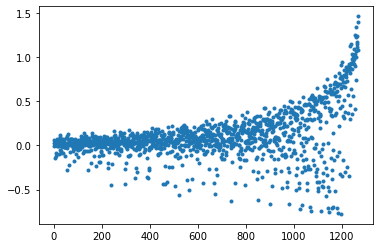

In [18]:
Y_diff['fractal_dimension'].plot(style='.')

<AxesSubplot:>

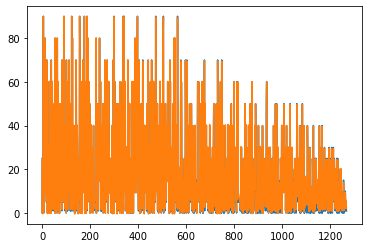

In [19]:
ax=Y_test['fraction_of_coating'].plot()
Y_pred['fraction_of_coating'].plot(ax=ax)

<AxesSubplot:>

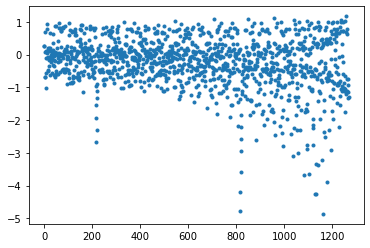

In [20]:
Y_diff['fraction_of_coating'].plot(style='.')

<AxesSubplot:>

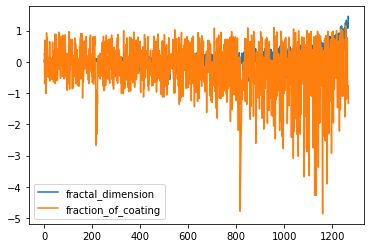

In [21]:
Y_diff.plot()

# NN

In [2]:


import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from keras.regularizers import l2





# Load dataset
df = pd.read_excel('database_new.xlsx')



train_set = df[(df['q_abs'] < 1.4)]
test_set = df[(df['q_abs'] >= 1.4)]
test_set.sort_values(by=['q_abs'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 3, 7, 24, 25, 26, 27]]
"""
# Standardizing data and targets
scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
"""
# Normalizaing Min max
scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
# Build NN model

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(7,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(2, kernel_initializer='glorot_normal', activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('inverse_q_abs/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('inverse_q_abs/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test)
Y_pred = scaling_y.inverse_transform(Y_pred)

# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])
# Y_test.reset_index(inplace=True, drop=True)

Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])

Y_diff = Y_test - Y_pred

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)



C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4096      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 267,778
Trainable params: 267,778
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
432/432 [==============================] - 5s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0994 - val_loss: 0.0887 - val_mean_absolute_error: 0.1844

Epoch 00001: val_loss improved from inf to 0.08869, saving model to inverse_q_abs\best_model.hdf5
Epoch 2/1000
432/432 [==============================] - 2s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.07

432/432 [==============================] - 2s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0282 - val_loss: 0.0275 - val_mean_absolute_error: 0.0759

Epoch 00032: val_loss did not improve from 0.02326
Epoch 33/1000
432/432 [==============================] - 2s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0297 - val_loss: 0.0217 - val_mean_absolute_error: 0.0669

Epoch 00033: val_loss improved from 0.02326 to 0.02170, saving model to inverse_q_abs\best_model.hdf5
Epoch 34/1000
432/432 [==============================] - 2s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0281 - val_loss: 0.0258 - val_mean_absolute_error: 0.0734

Epoch 00034: val_loss did not improve from 0.02170
Epoch 35/1000
432/432 [==============================] - 2s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0288 - val_loss: 0.0248 - val_mean_absolute_error: 0.0731

Epoch 00035: val_loss did not improve from 0.02170
Epoch 36/1000
432/432 [==============================] - 2s 4ms/step - loss: 0.0049 - m

432/432 [==============================] - 2s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0226 - val_loss: 0.0255 - val_mean_absolute_error: 0.0682

Epoch 00069: val_loss did not improve from 0.02048
Epoch 70/1000
432/432 [==============================] - 2s 4ms/step - loss: 0.0041 - mean_absolute_error: 0.0222 - val_loss: 0.0229 - val_mean_absolute_error: 0.0647

Epoch 00070: val_loss did not improve from 0.02048
Epoch 71/1000
432/432 [==============================] - 2s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0224 - val_loss: 0.0247 - val_mean_absolute_error: 0.0697

Epoch 00071: val_loss did not improve from 0.02048
Epoch 72/1000
432/432 [==============================] - 2s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0219 - val_loss: 0.0257 - val_mean_absolute_error: 0.0688

Epoch 00072: val_loss did not improve from 0.02048
Epoch 73/1000
432/432 [==============================] - 2s 3ms/step - loss: 0.0040 - mean_absolute_error: 0.0219 - val_loss: 0.0274 - val

432/432 [==============================] - 2s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0201 - val_loss: 0.0270 - val_mean_absolute_error: 0.0760

Epoch 00106: val_loss did not improve from 0.02048
Epoch 107/1000
432/432 [==============================] - 2s 4ms/step - loss: 0.0034 - mean_absolute_error: 0.0191 - val_loss: 0.0278 - val_mean_absolute_error: 0.0791

Epoch 00107: val_loss did not improve from 0.02048
Epoch 108/1000
432/432 [==============================] - 2s 3ms/step - loss: 0.0036 - mean_absolute_error: 0.0195 - val_loss: 0.0288 - val_mean_absolute_error: 0.0784

Epoch 00108: val_loss did not improve from 0.02048
Epoch 109/1000
432/432 [==============================] - 2s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0201 - val_loss: 0.0311 - val_mean_absolute_error: 0.0836

Epoch 00109: val_loss did not improve from 0.02048
Epoch 110/1000
432/432 [==============================] - 1s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0203 - val_loss: 0.0252 -

<AxesSubplot:>

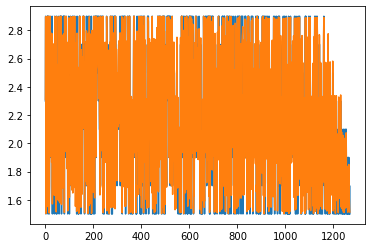

In [3]:
ax=Y_test['fractal_dimension'].plot()
Y_pred['fractal_dimension'].plot(ax=ax)

<AxesSubplot:>

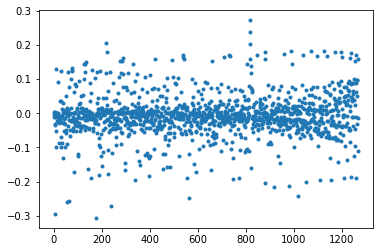

In [8]:
Y_diff['fractal_dimension'].plot(style='.')

<AxesSubplot:>

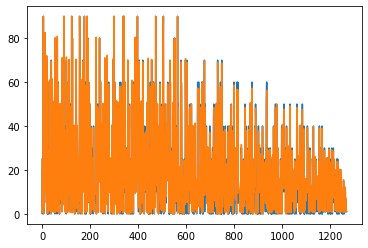

In [5]:
ax=Y_test['fraction_of_coating'].plot()
Y_pred['fraction_of_coating'].plot(ax=ax)

<AxesSubplot:>

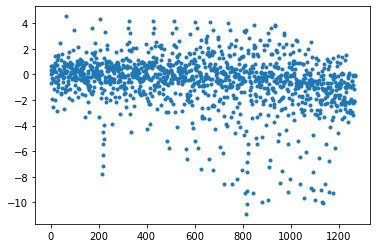

In [9]:
Y_diff['fraction_of_coating'].plot(style='.')

<AxesSubplot:>

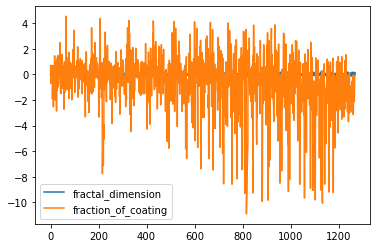

In [7]:
Y_diff.plot()

# NN